In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import pickle
import swifter
import scipy.stats as sps
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.manifold import TSNE
pd.set_option('max_columns',None)

In [3]:
def_data = pd.read_pickle('../../FootballPlayerFootedness_copy/data/defender_clusters/defender_attrs_def_region_wise.pkl')

In [4]:
def_data.head()

,index,player_name,team,position,footedness,matches_played,passes,accpass,progaccpass,proginaccpass,accpassloc,inaccpassloc,progaccpassloc,proginaccpassloc,accpassvaep,inaccpassvaep,progaccpassvaep,proginaccpassvaep,accpassoff,inaccpassoff,progaccpassoff,proginaccpassoff,accpassdef,inaccpassdef,progaccpassdef,proginaccpassdef,prog_acc_region_per_pass,vaep_acc_region_per_pass,prog_inacc_region_per_pass,vaep_inacc_region_per_pass,off_acc_region_per_pass,off_inacc_region_per_pass,def_acc_region_per_pass,def_inacc_region_per_pass,progpreference_per_region,progaccuracy_per_region,total_off_region_per_pass
0,0,AaronCresswell,West Ham,LB,left,7.0,275,203,43,47,"[[[11.44, 47.6], [10.4, 48.96]], [[21.84, 58.4...","[[[22.88, 65.28], [31.2, 63.24]], [[24.96, 61....","[[[73.84, 66.64], [94.64, 63.92]], [[63.44, 55...","[[[24.96, 61.2], [49.92, 37.4]], [[40.56, 64.6...","[-0.0060007767751812935, 0.014951384626328945,...","[-0.005001368001103401, 0.0014556727837771177,...","[0.010874261148273945, -0.0008622575551271439,...","[0.0014556727837771177, -0.004146812949329615,...","[-0.00111871468834579, 0.0030969707295298576, ...","[-0.0018319590017199516, 0.0011951092164963484...","[0.010732980445027351, -0.0017494764178991318,...","[0.0011951092164963484, -0.0003939601592719555...","[-0.00488206185400486, 0.011854413896799088, 0...","[-0.003169409232214093, 0.00026056356728076935...","[0.00014128070324659348, 0.0008872188627719879...","[0.00026056356728076935, -0.003752852790057659...","[2.33, 2.33, 2.33, 2.33, 53.49, 20.93, 9.3, 6.98]","[4.351908341050148, 2.852484816685319, 11.1506...","[0, 4.26, 0, 0, 36.17, 38.3, 4.26, 17.02]","[0, -0.8253974374383688, 0, 0, -4.327049506280...","[3.6003405693918467, 5.269106011837721, 3.0451...","[0, 0.31970476265996695, 0, 0, -3.263597869697...","[0.7515675388276577, -2.416621195152402, 8.105...","[0, -1.1451022000983357, 0, 0, -1.063451554407...","[1.11, 3.33, 1.11, 1.11, 44.44, 30.0, 6.67, 12...","[100.0, 33.33, 100.0, 100.0, 57.5, 33.33, 66.6...","[3.6003405693918467, 1.9695051790525517, 3.045..."
1,1,AaronCresswell,West Ham,LCB,left,20.0,796,644,184,91,"[[[27.04, 51.68], [55.12, 64.6]], [[65.52, 61....","[[[62.4, 51.0], [78.0, 49.64]], [[79.04, 61.2]...","[[[27.04, 51.68], [55.12, 64.6]], [[61.36, 59....","[[[62.4, 51.0], [78.0, 49.64]], [[79.04, 61.2]...","[0.0010694738011807203, 0.002371369395405054, ...","[-0.00956201646476984, -0.007710381411015987, ...","[0.0010694738011807203, 0.002284318208694458, ...","[-0.00956201646476984, -0.007710381411015987, ...","[0.0018120664171874523, 0.002711281180381775, ...","[-0.006647953763604164, -0.006097717210650444,...","[0.0018120664171874523, 0.0021007489413022995,...","[-0.006647953763604164, -0.006097717210650444,...","[-0.0007425926742143929, -0.000339911784976720...","[-0.002914062701165676, -0.001612664433196187,...","[-0.0007425926742143929, 0.0001835691509768366...","[-0.002914062701165676, -0.001612664433196187,...","[1.63, 0, 0.54, 0, 66.3, 19.57, 8.15, 3.8]","[16.502801328897476, 0, 3.1730758491903543, 0,...","[2.2, 3.3, 0, 2.2, 37.36, 36.26, 10.99, 7.69]","[-0.38534030318260193, 1.5773851579676073, 0, ...","[2.848291303962469, 0, 1.703751739114523, 0, 5...","[-0.1581189571879804, -0.8412844811876615, 0, ...","[13.65451041298608, 0, 1.4693241100758314, 0, ...","[-0.22722140420228243, 2.418669561545054, 0, 0...","[1.82, 1.09, 0.36, 0.73, 56.73, 25.09, 9.09, 5...","[60.0, 0.0, 100.0, 0.0, 78.21, 52.17, 60.0, 50.0]","[1.6457271995022893, -0.8412844811876615, 1.70..."
2,2,AaronWanBissaka,Crystal Palace,RB,right,7.0,226,165,39,20,"[[[60.32, 11.56], [70.72, 8.84]], [[55.12, 11....","[[[86.32, 22.44], [87.36, 25.84]], [[98.8, 10....","[[[60.32, 11.56], [70.72, 8.84]], [[83.2, 12.9...","[[[30.16, 6.8], [70.72, 0.0]], [[57.2, 3.4], [...","[0.0027392818592488766, -0.0019667267333716154...","[-0.02877645380795002, -0.01624043844640255, -...","[0.0027392818592488766, -0.011097729206085205,...","[-0.004570803605020046, -0.008917007595300674,...","[0.0028141736

In [5]:
cb_data = def_data.loc[def_data['position'].str.contains('CB')]

In [6]:
cb_data_progfil = cb_data.loc[cb_data['progaccpass'] + cb_data['proginaccpass'] >= 20]

In [7]:
len(cb_data_progfil)

172

In [8]:
cb_data_fil = cb_data_progfil[['player_name','team','position','footedness','matches_played','progaccpass','proginaccpass',
                              'accpassloc','inaccpassloc','progpreference_per_region','total_off_region_per_pass']]

In [9]:
cb_data_fil.reset_index(inplace = True)

In [10]:
def get_ind_regions(df):
    df1 = pd.DataFrame(df['progpreference_per_region'].tolist(), columns = ['def_LF_pref','def_LC_pref','def_RC_pref','def_RF_pref','att_LF_pref','att_LC_pref','att_RC_pref','att_RF_pref'])
    df2 = pd.DataFrame(df['total_off_region_per_pass'].tolist(), columns = ['def_LF_off','def_LC_off','def_RC_off','def_RF_off','att_LF_off','att_LC_off','att_RC_off','att_RF_off'])
    df = pd.concat([df,df1,df2], axis = 1)
    df.drop(['progpreference_per_region','total_off_region_per_pass'], axis = 1, inplace = True)
    return df

In [11]:
cb_data_cluster = get_ind_regions(cb_data_fil)

In [12]:
# Function to get x and y coordinates of pass locations
def getxy(locs):
    x = list()
    y = list()
    for p in locs:
        x.append(p[0])
        y.append(p[1])
    return x,y

In [13]:
# Function to get start and end location points for every row in df
def getstartend(locs):
    end_points = list()
    start_points = list()
    for point in locs:
            if point != []:
                end_points.append(point[1])
                start_points.append(point[0])
    return start_points,end_points

In [14]:
def est_dense_reg(a, b, p):
    df_kde = pd.DataFrame(columns=['x', 'y'])
    df_kde['x'] = a
    df_kde['y'] = b
    kde = sps.gaussian_kde(df_kde.values.T)
    xx, yy = np.meshgrid(
    np.linspace(0, 104, 500),
    np.linspace(0, 68, 500))
    z = kde.pdf([xx.ravel(), yy.ravel()]).reshape(xx.shape)
    zi = z > np.max(z) * (p/10)
    x1 = [min(xx[zi]), max(xx[zi])]
    y1 = [min(yy[zi]), max(yy[zi])]
    return x1, y1

In [15]:
cb_data_cluster['accpassloc'] = cb_data_cluster['accpassloc'].swifter.set_npartitions(8).apply(lambda x: getstartend(x))
cb_data_cluster['accpassloc'] = cb_data_cluster['accpassloc'].swifter.set_npartitions(8).apply(lambda x: x[0])
cb_data_cluster['inaccpassloc'] = cb_data_cluster['inaccpassloc'].swifter.set_npartitions(8).apply(lambda x: getstartend(x))
cb_data_cluster['inaccpassloc'] = cb_data_cluster['inaccpassloc'].swifter.set_npartitions(8).apply(lambda x: x[0])
cb_data_cluster['contour_bounds'] = cb_data_cluster['accpassloc']+cb_data_cluster['inaccpassloc']

In [16]:
cb_data_cluster['contour_bounds'] = cb_data_cluster['contour_bounds'].swifter.set_npartitions(8).apply(
    lambda x: est_dense_reg(getxy(x)[0],
                            getxy(x)[1], 6))

In [17]:
att_cols = [c for c in cb_data_cluster.columns if 'def' not in c]
print(att_cols)

['index', 'player_name', 'team', 'position', 'footedness', 'matches_played', 'progaccpass', 'proginaccpass', 'accpassloc', 'inaccpassloc', 'att_LF_pref', 'att_LC_pref', 'att_RC_pref', 'att_RF_pref', 'att_LF_off', 'att_LC_off', 'att_RC_off', 'att_RF_off', 'contour_bounds']


In [37]:
cb_data_cluster_att = cb_data_cluster[att_cols]

In [38]:
feature_cols = att_cols[3:]
print(feature_cols)

['position', 'footedness', 'matches_played', 'progaccpass', 'proginaccpass', 'accpassloc', 'inaccpassloc', 'att_LF_pref', 'att_LC_pref', 'att_RC_pref', 'att_RF_pref', 'att_LF_off', 'att_LC_off', 'att_RC_off', 'att_RF_off', 'contour_bounds']


In [39]:
cb_data_cluster_att.head()

,index,player_name,team,position,footedness,matches_played,progaccpass,proginaccpass,accpassloc,inaccpassloc,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,att_RF_off,contour_bounds
0,1,AaronCresswell,West Ham,LCB,left,20.0,184,91,"[[27.04, 51.68], [65.52, 61.88], [61.36, 59.84...","[[62.4, 51.0], [79.04, 61.2], [15.6, 63.92], [...",56.73,25.09,9.09,5.09,4.098572,10.470576,19.408194,2.985546,"([25.010020040080157, 70.86172344689378], [48...."
1,7,AdrianMariappa,Watford,L_CB,right,5.0,29,17,"[[36.4, 45.56], [30.16, 46.24], [23.92, 34.68]...","[[43.68, 20.4], [27.04, 59.16], [74.88, 48.28]...",43.48,23.91,15.22,10.87,1.573852,3.925124,10.267141,3.539957,"([20.216432865731463, 39.80761523046092], [38...."
2,9,AdrianMariappa,Watford,RCB,right,11.0,71,26,"[[31.2, 10.2], [27.04, 9.52], [27.04, 15.64], ...","[[28.08, 9.52], [11.44, 10.2], [26.0, 29.24], ...",8.25,10.31,19.59,44.33,3.459880,13.321521,5.660290,3.638874,"([19.79959919839679, 45.64328657314629], [5.17..."
3,10,AdrianMariappa,Watford,R_CB,right,4.0,27,8,"[[30.16, 14.96], [38.48, 9.52], [24.96, 18.36]...","[[41.6, 2.04], [23.92, 11.56], [13.52, 24.48],...",8.57,25.71,17.14,28.57,4.365592,26.320795,1.666600,1.050037,"([18.132264529058116, 38.348697394789575], [12..."
4,11,AhmedHegazi,West Brom,CB,right,7.0,45,14,"[[26.0, 31.28], [30.16, 27.2], [28.08, 31.96],...","[[10.4, 4.08], [28.08, 35.36], [30.16, 46.24],...",23.73,15.25,16.95,35.59,3.901891,7.576896,19.058473,3.556777,"([20.424849699398795, 39.39078156312625], [22...."


In [40]:
cb_data_cluster_att_1 = pd.get_dummies(cb_data_cluster_att[feature_cols],prefix = ['pos','foot'], columns = ['position','footedness'])

In [41]:
cb_data_cluster_att_2 = pd.concat([cb_data_cluster_att.iloc[:,:5],cb_data_cluster_att_1],axis=1)

In [42]:
cb_data_cluster_att_2.drop(['accpassloc','inaccpassloc','matches_played','progaccpass','proginaccpass'],axis=1, inplace = True)

In [43]:
def get_contour_xy(row):
    init_x = row['contour_bounds'][0][0]
    final_x = row['contour_bounds'][0][1]
    init_y = row['contour_bounds'][1][0]
    final_y = row['contour_bounds'][1][0]
    return pd.Series([init_x,final_x,init_y,final_y])
    

In [44]:
cb_data_cluster_att_2[['init_x','final_x','init_y','final_y']]=cb_data_cluster_att_2.apply(lambda row: get_contour_xy(row),axis=1)

In [45]:
cb_data_cluster_att_2.drop(['contour_bounds'],axis=1,inplace=True)

In [47]:
scaler = StandardScaler()
cols = cb_data_cluster_att_2.columns.tolist()
scal_cols = cols[5:]
scaler.fit(cb_data_cluster_att_2[scal_cols])
temp = scaler.transform(cb_data_cluster_att_2[scal_cols])

In [48]:
temp_df = pd.DataFrame(temp, columns = scal_cols)

In [49]:
temp_df.head()

,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,att_RF_off,pos_CB,pos_LCB,pos_L_CB,pos_RCB,pos_R_CB,foot_left,foot_right,init_x,final_x,init_y,final_y
0,2.038266,1.259497,-1.114202,-1.435968,0.618321,0.241310,2.444330,-0.061641,-0.362738,2.220593,-0.595257,-0.440959,-0.640184,2.091650,-2.091650,0.837534,2.294863,1.545607,1.545607
1,1.170655,1.090182,-0.244292,-1.054210,-0.519093,-0.660501,0.604310,0.176572,-0.362738,-0.450330,1.679947,-0.440959,-0.640184,-0.478091,0.478091,-0.840928,-0.844663,0.899094,0.899094
2,-1.136209,-0.861252,0.375856,1.155762,0.330583,0.634104,-0.323012,0.219073,-0.362738,-0.450330,-0.595257,2.267787,-0.640184,-0.478091,0.478091,-0.986882,-0.254685,-1.322726,-1.322726
3,-1.115256,1.348460,0.028176,0.114843,0.738617,2.425102,-1.126909,-0.893267,-0.362738,-0.450330,-0.595257,-0.440959,1.562050,-0.478091,0.478091,-1.570695,-0.992158,-0.858329,-0.858329
4,-0.122577,-0.152422,0.001213,0.578501,0.529714,-0.157371,2.373934,0.183798,2.756810,-0.450330,-0.595257,-0.440959,-0.640184,-0.478091,0.478091,-0.767952,-0.886805,-0.175393,-0.175393


In [50]:
cb_data_scaled = pd.concat([cb_data_cluster_att_2.iloc[:,:5],temp_df],axis=1)

In [51]:
cb_data_scaled.head()

,index,player_name,team,position,footedness,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,att_RF_off,pos_CB,pos_LCB,pos_L_CB,pos_RCB,pos_R_CB,foot_left,foot_right,init_x,final_x,init_y,final_y
0,1,AaronCresswell,West Ham,LCB,left,2.038266,1.259497,-1.114202,-1.435968,0.618321,0.241310,2.444330,-0.061641,-0.362738,2.220593,-0.595257,-0.440959,-0.640184,2.091650,-2.091650,0.837534,2.294863,1.545607,1.545607
1,7,AdrianMariappa,Watford,L_CB,right,1.170655,1.090182,-0.244292,-1.054210,-0.519093,-0.660501,0.604310,0.176572,-0.362738,-0.450330,1.679947,-0.440959,-0.640184,-0.478091,0.478091,-0.840928,-0.844663,0.899094,0.899094
2,9,AdrianMariappa,Watford,RCB,right,-1.136209,-0.861252,0.375856,1.155762,0.330583,0.634104,-0.323012,0.219073,-0.362738,-0.450330,-0.595257,2.267787,-0.640184,-0.478091,0.478091,-0.986882,-0.254685,-1.322726,-1.322726
3,10,AdrianMariappa,Watford,R_CB,right,-1.115256,1.348460,0.028176,0.114843,0.738617,2.425102,-1.126909,-0.893267,-0.362738,-0.450330,-0.595257,-0.440959,1.562050,-0.478091,0.478091,-1.570695,-0.992158,-0.858329,-0.858329
4,11,AhmedHegazi,West Brom,CB,right,-0.122577,-0.152422,0.001213,0.578501,0.529714,-0.157371,2.373934,0.183798,2.756810,-0.450330,-0.595257,-0.440959,-0.640184,-0.478091,0.478091,-0.767952,-0.886805,-0.175393,-0.175393


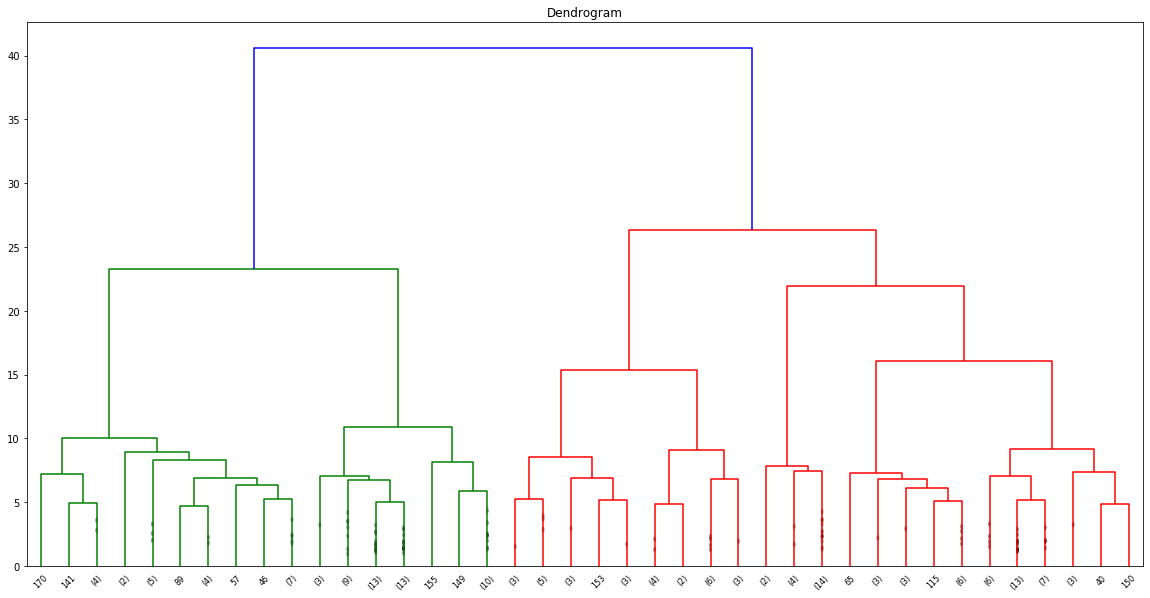

In [52]:
plt.figure(figsize=(20,10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(cb_data_scaled[scal_cols], method='ward', metric = 'euclidean'),truncate_mode = 'lastp',p=40, show_contracted = True)

In [100]:
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
groups = cluster.fit_predict(cb_data_scaled[scal_cols])
groups

array([2, 0, 3, 1, 4, 0, 0, 1, 1, 0, 0, 4, 4, 2, 2, 0, 3, 4, 0, 1, 2, 2,
       2, 2, 0, 3, 1, 3, 0, 1, 4, 0, 0, 1, 0, 2, 2, 1, 3, 1, 0, 4, 4, 3,
       1, 0, 3, 0, 1, 2, 3, 1, 2, 4, 1, 0, 1, 3, 4, 0, 0, 0, 3, 1, 1, 0,
       3, 0, 1, 0, 1, 3, 2, 2, 1, 4, 1, 4, 0, 0, 3, 1, 2, 1, 2, 2, 0, 3,
       1, 3, 0, 0, 3, 1, 0, 2, 2, 1, 1, 4, 0, 1, 0, 3, 1, 2, 2, 3, 1, 1,
       4, 2, 2, 2, 2, 0, 0, 1, 2, 4, 0, 0, 1, 0, 0, 1, 2, 0, 0, 3, 4, 1,
       4, 0, 1, 2, 4, 1, 1, 4, 0, 3, 1, 3, 1, 4, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 1, 3, 1, 0, 1, 0, 1, 1, 2, 2, 4, 0, 3, 1, 1, 3, 1])

In [101]:
groupsdf = pd.DataFrame(groups, columns=['groups'])

In [102]:
cb_data_copy = cb_data_cluster_att_2
cb_data_grp_copy = pd.concat([cb_data_copy,groupsdf],axis=1)

In [103]:
cb_data_grp_copy = cb_data_grp_copy.astype({'groups':'category'})

In [113]:
cb_data_grp_copy.loc[cb_data_grp_copy['groups']==4]

,index,player_name,team,position,footedness,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,att_RF_off,pos_CB,pos_LCB,pos_L_CB,pos_RCB,pos_R_CB,foot_left,foot_right,init_x,final_x,init_y,final_y,groups
4,11,AhmedHegazi,West Brom,CB,right,23.73,15.25,16.95,35.59,3.901891,7.576896,19.058473,3.556777,1,0,0,0,0,0,1,20.424850,39.390782,22.348697,22.348697,4
11,26,AndreasChristensen,Chelsea,CB,right,15.99,19.73,13.95,31.97,3.505479,4.539223,7.901780,3.633077,1,0,0,0,0,0,1,24.801603,52.937876,26.573146,26.573146,4
12,30,AngeloOgbonna,West Ham,CB,left,32.37,20.14,16.55,8.63,2.593756,4.054128,0.874742,4.553418,1,0,0,0,0,1,0,24.176353,39.807615,29.162325,29.162325,4
17,37,AshleyWilliams,Everton,CB,right,13.51,5.41,29.73,32.43,3.365793,5.760370,3.136961,2.935298,1,0,0,0,0,0,1,23.967936,40.641283,24.256513,24.256513,4
30,75,ChristianKabasele,Watford,CB,right,31.82,22.73,11.36,13.64,6.221438,5.035012,7.378027,-0.570814,1,0,0,0,0,0,1,20.424850,42.308617,20.032064,20.032064,4
41,101,DavidLuiz,Chelsea,CB,right,27.05,19.67,15.57,24.59,4.270302,9.645099,10.123915,5.023086,1,0,0,0,0,0,1,23.551102,39.182365,23.302605,23.302605,4
42,102,DavinsonSanchez,Spurs,CB,right,19.35,18.28,18.28,23.66,1.687073,4.715131,3.945855,3.528975,1,0,0,0,0,0,1,23.759519,37.723447,27.799599,27.799599,4
53,127,FedericoFernandez,Swansea,CB,right,13.57,5.00,15.00,43.57,5.956083,7.211164,8.363992,3.621078,1,0,0,0,0,0,1,20.841683,38.140281,19.623246,19.623246,4
58,140,GaryCahill,Chelsea,CB,right,12.31,18.46,18.46,32.31,2.698827,6.891289,6.160417,1.894294,1,0,0,0,0,0,1,24.593186,38.557114,25.074148,25.074148,4
75,183,JohnStones,Man City,CB,right,20.83,25.00,16.67,29.17,2.183654,5.746202,6.159871,1.153069,1,0,0,0,0,0,1,27.094188,61.066132,24.392786,24.392786,4


In [114]:
def plot_groups(df,region):
    regions = [
        'leftflank_attack', 'leftcentral_attack',
        'rightcentral_attack', 'rightflank_attack'
    ]
    fig = px.scatter(df,x='att_'+region+'_pref',y='att_'+region+'_off',color='groups', hover_data=['player_name','team','position','footedness'])
    fig.show()

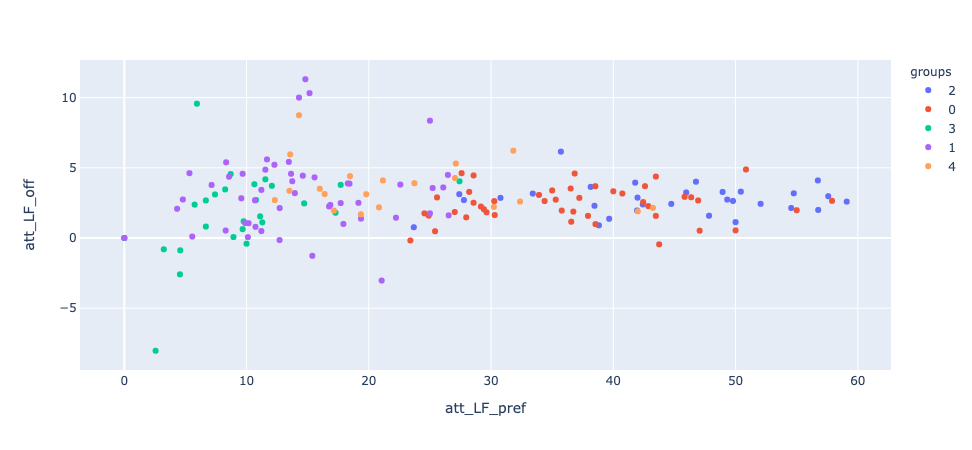

In [115]:
plot_groups(cb_data_grp_copy,'LF')

In [116]:
tsne = TSNE(n_components=2, perplexity=30, verbose=1,n_iter=700, metric = 'euclidean')
tsne_results = tsne.fit_transform(cb_data_grp_copy.iloc[:,5:-1])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 172 samples in 0.000s...
[t-SNE] Computed neighbors for 172 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 172 / 172
[t-SNE] Mean sigma: 8.407005
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.842789
[t-SNE] KL divergence after 700 iterations: 0.357614


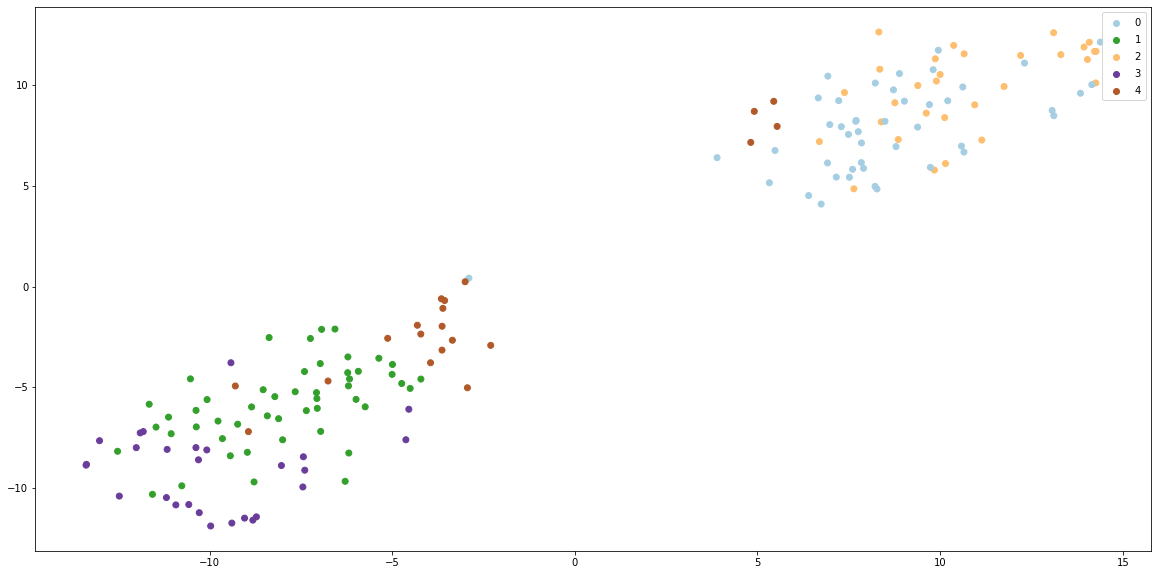

In [117]:
plt.figure(figsize=(20,10))
scatter1 = plt.scatter(tsne_results[:,0],tsne_results[:,1],c=cb_data_grp_copy['groups'].tolist(),cmap='Paired')
plt.legend(*scatter1.legend_elements())